## Opis zmiennych w ramce danych

1. variety - Odmiana banana : (Blue Java, Burro, Cavendish, Fehi, Lady Finger, Manzano, Plantain, Red Dacca)
2. region - Kraj/region, w którym wyhodowano banana : (Brazil, Colombia, Costa Rica, Ecuador, Guatemala, Honduras, India, Philippines)
3. quality_category - Kategoria jakościowa banana : (Good, Premium, Processing, Unripe)
4. ripeness_index - Wskaźnik dojrzałości banana : (1.02 - 7.00)
5. ripeness_category - Kategoria określająca stopień dojrzałości : (Green, Overripe, Ripe, Turning)
6. sugar_content_brix - Zawartość cukru w bananie : (Brix – miara słodkości)
7. firmness_kgf - Twardość banana : (kgf – kilogram-siła)
8. length_cm - Długość banana w centymetrach
9. weight_g - Masa banana w gramach
10. harvest_date - Data zbioru banana
11. tree_age_years - Wiek drzewa bananowego
12. altitude_m - Wysokość nad poziomem morza, na której rosło drzewo
13. rainfall_mm - Suma opadów w regionie uprawy
14. soil_nitrogen_ppm - Zawartość azotu w glebie : (ppm - części na milion)

## Import potrzebnych bibliotek do analizy danych

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

## Wczytanie ramki danych

In [31]:
df = pd.read_csv("banana_quality_dataset.csv")

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami próbek (sample_id) oraz kolumnę quality_score w związku z tym, że jest ona jedną z dwóch do wyboru zmiennych celu (wraz z quality_category), a interesuje nas klasyfikacja wieloklasowa, więc wybieramy quality_category.

In [32]:
df = df.drop(["sample_id",
             "quality_score"], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [33]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index)
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) 

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ripeness_index,1000.0,4.04217,1.753211,1.02,2.4475,4.110,5.5625,7.00
sugar_content_brix,1000.0,18.51683,2.034812,15.00,16.8275,18.500,20.3125,21.98
firmness_kgf,1000.0,2.70684,1.289252,0.50,1.5900,2.680,3.8200,5.00
length_cm,1000.0,19.88210,5.736318,10.00,14.9025,19.890,24.8000,29.95
weight_g,1000.0,164.73893,49.163073,81.05,122.3975,163.365,205.7750,249.89
tree_age_years,1000.0,10.87960,5.215554,2.00,6.3000,10.700,15.6000,20.00
altitude_m,1000.0,723.55670,427.372855,0.40,353.9500,726.000,1071.7250,1498.40
rainfall_mm,1000.0,1972.99280,564.467912,1000.50,1498.7500,1957.400,2431.8000,2992.00
soil_nitrogen_ppm,1000.0,104.39130,53.607794,10.00,60.1500,104.100,149.8500,199.90


## Obliczenie skośności

In [35]:
df[numerical_features].skew()

ripeness_index       -0.059245
sugar_content_brix   -0.022406
firmness_kgf          0.030561
length_cm             0.031794
weight_g              0.032442
tree_age_years        0.059766
altitude_m            0.063876
rainfall_mm           0.056509
soil_nitrogen_ppm     0.014225
dtype: float64

## Wyświetlenie typów kolumn

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_category    1000 non-null   object 
 3   ripeness_index      1000 non-null   float64
 4   ripeness_category   1000 non-null   object 
 5   sugar_content_brix  1000 non-null   float64
 6   firmness_kgf        1000 non-null   float64
 7   length_cm           1000 non-null   float64
 8   weight_g            1000 non-null   float64
 9   harvest_date        1000 non-null   object 
 10  tree_age_years      1000 non-null   float64
 11  altitude_m          1000 non-null   float64
 12  rainfall_mm         1000 non-null   float64
 13  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(9), object(5)
memory usage: 109.5+ KB


In [37]:
df.isnull().sum()>0

variety               False
region                False
quality_category      False
ripeness_index        False
ripeness_category     False
sugar_content_brix    False
firmness_kgf          False
length_cm             False
weight_g              False
harvest_date          False
tree_age_years        False
altitude_m            False
rainfall_mm           False
soil_nitrogen_ppm     False
dtype: bool

## Obsłużenie braków danych
Powyżej widać, że nie mamy braków danych, zatem nie musimy ich obsługiwać.

## Wykresy przed obsłużeniem outliers

### Histogramy

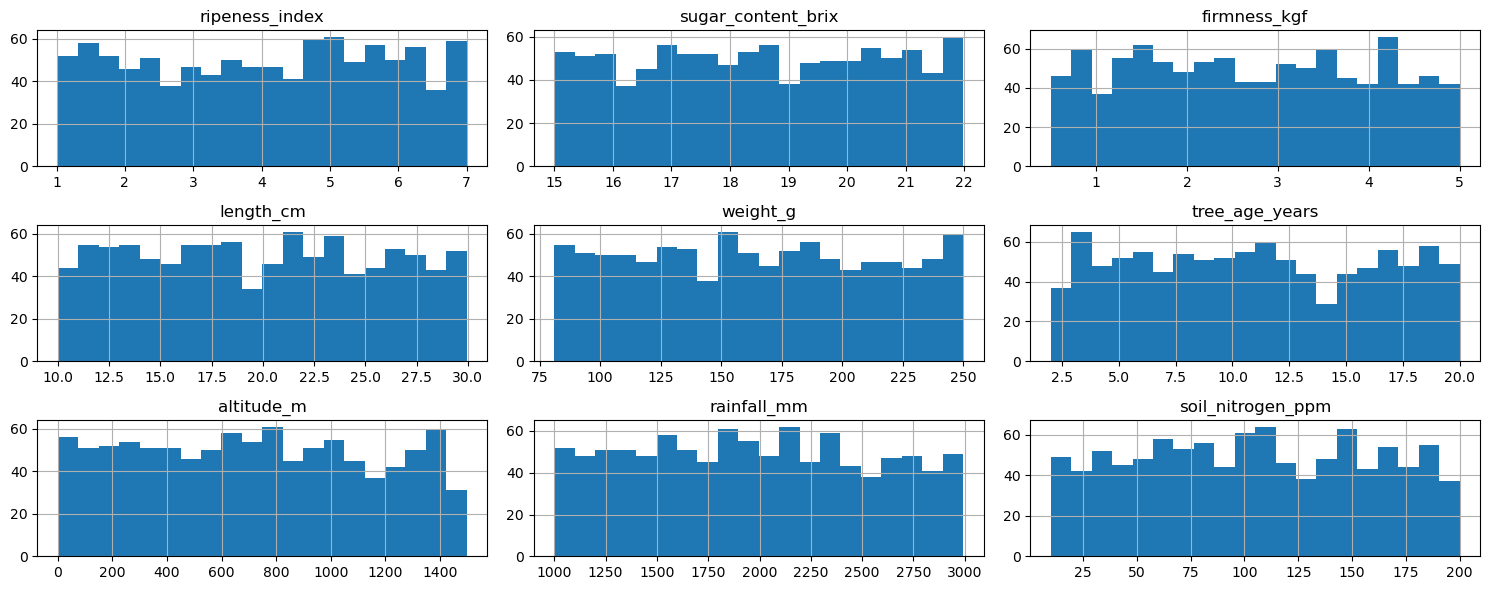

In [38]:
df.hist(bins=20, figsize=(15, 6), layout=(3, 3))
plt.tight_layout()
plt.show()

### Wykresy pudełkowe - przed obsłużeniem outliers

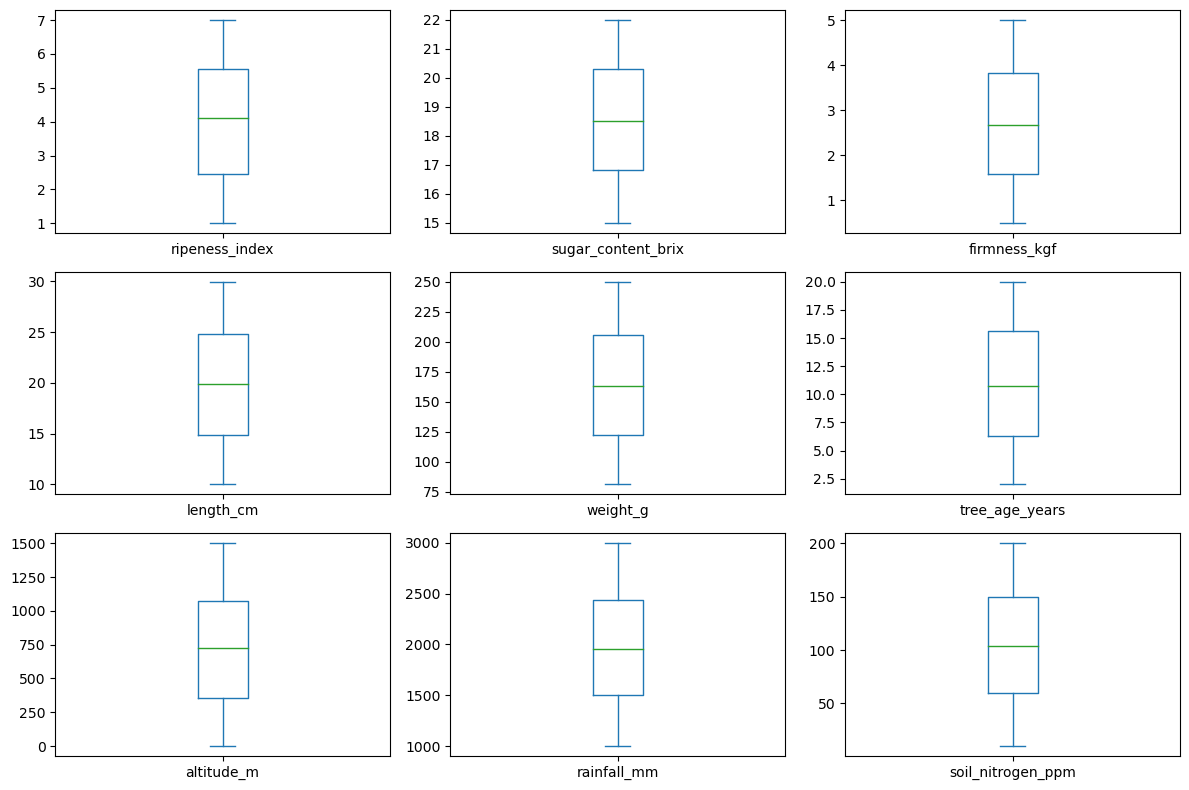

In [39]:
df.plot.box(subplots=True, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

## Obsługa outliers
Na powyższym wykresie można zauważyć, że nie ma outlierów, więc nie musimy ich obsługiwać.

## Obliczenie korelacji

In [40]:
df[numerical_features].corr()

,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
ripeness_index,1.000000,0.027318,-0.005850,0.032862,0.030081,0.042175,0.050076,0.003166,-0.065418
sugar_content_brix,0.027318,1.000000,-0.013572,-0.008925,-0.020328,-0.028472,-0.046773,-0.005169,0.013128
firmness_kgf,-0.005850,-0.013572,1.000000,-0.044788,0.040061,-0.016933,-0.022841,0.025458,0.004460
length_cm,0.032862,-0.008925,-0.044788,1.000000,-0.055880,0.020556,-0.008890,0.028341,0.005156
weight_g,0.030081,-0.020328,0.040061,-0.055880,1.000000,0.007971,0.012290,-0.031945,-0.002808
tree_age_years,0.042175,-0.028472,-0.016933,0.020556,0.007971,1.000000,0.038132,0.001233,0.013124
altitude_m,0.050076,-0.046773,-0.022841,-0.008890,0.012290,0.038132,1.000000,-0.049308,-0.008828
rainfall_mm,0.003166,-0.005169,0.025458,0.028341,-0.031945,0.001233,-0.049308,1.000000,0.017463
soil_nitrogen_ppm,-0.065418,0.013128,0.004460,0.005156,-0.002808,0.013124,-0.008828,0.017463,1.000000


## Generacja heat mapy korelacji

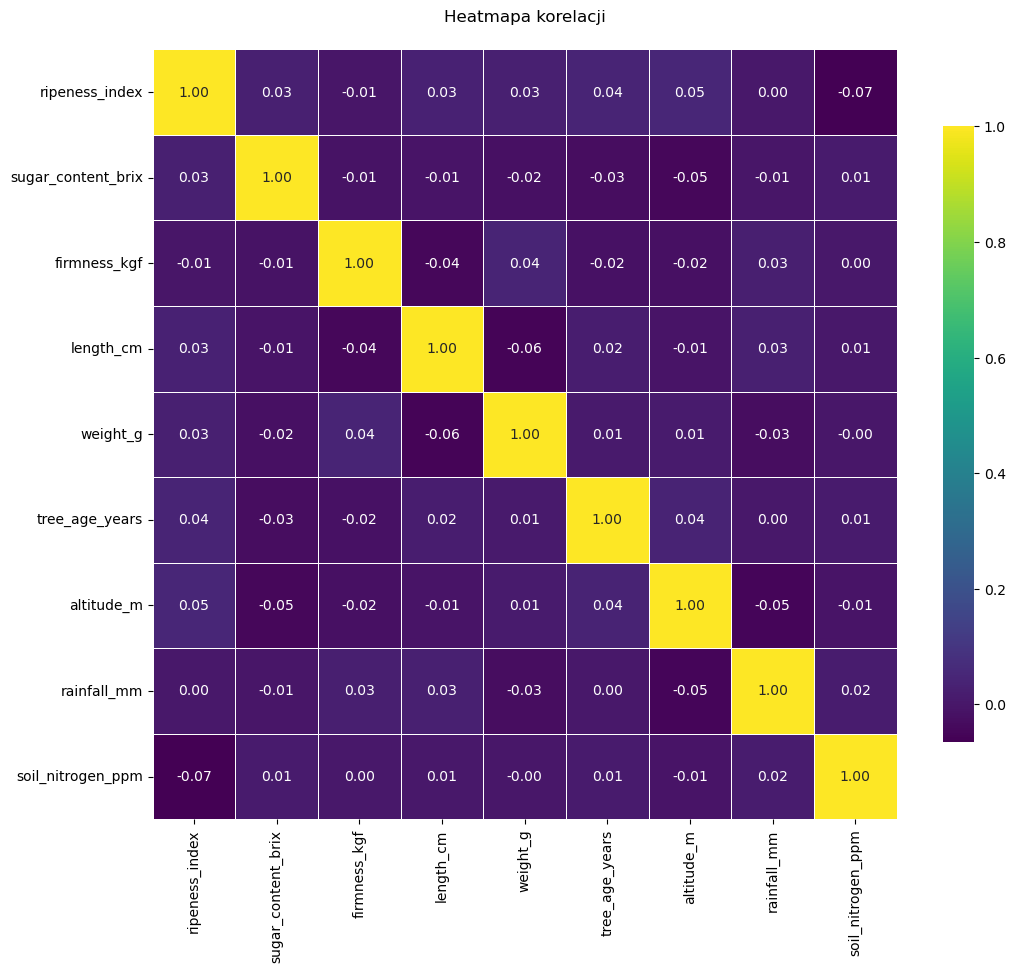

In [41]:
corr = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()

c:\Dev\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Dev\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Dev\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Dev\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

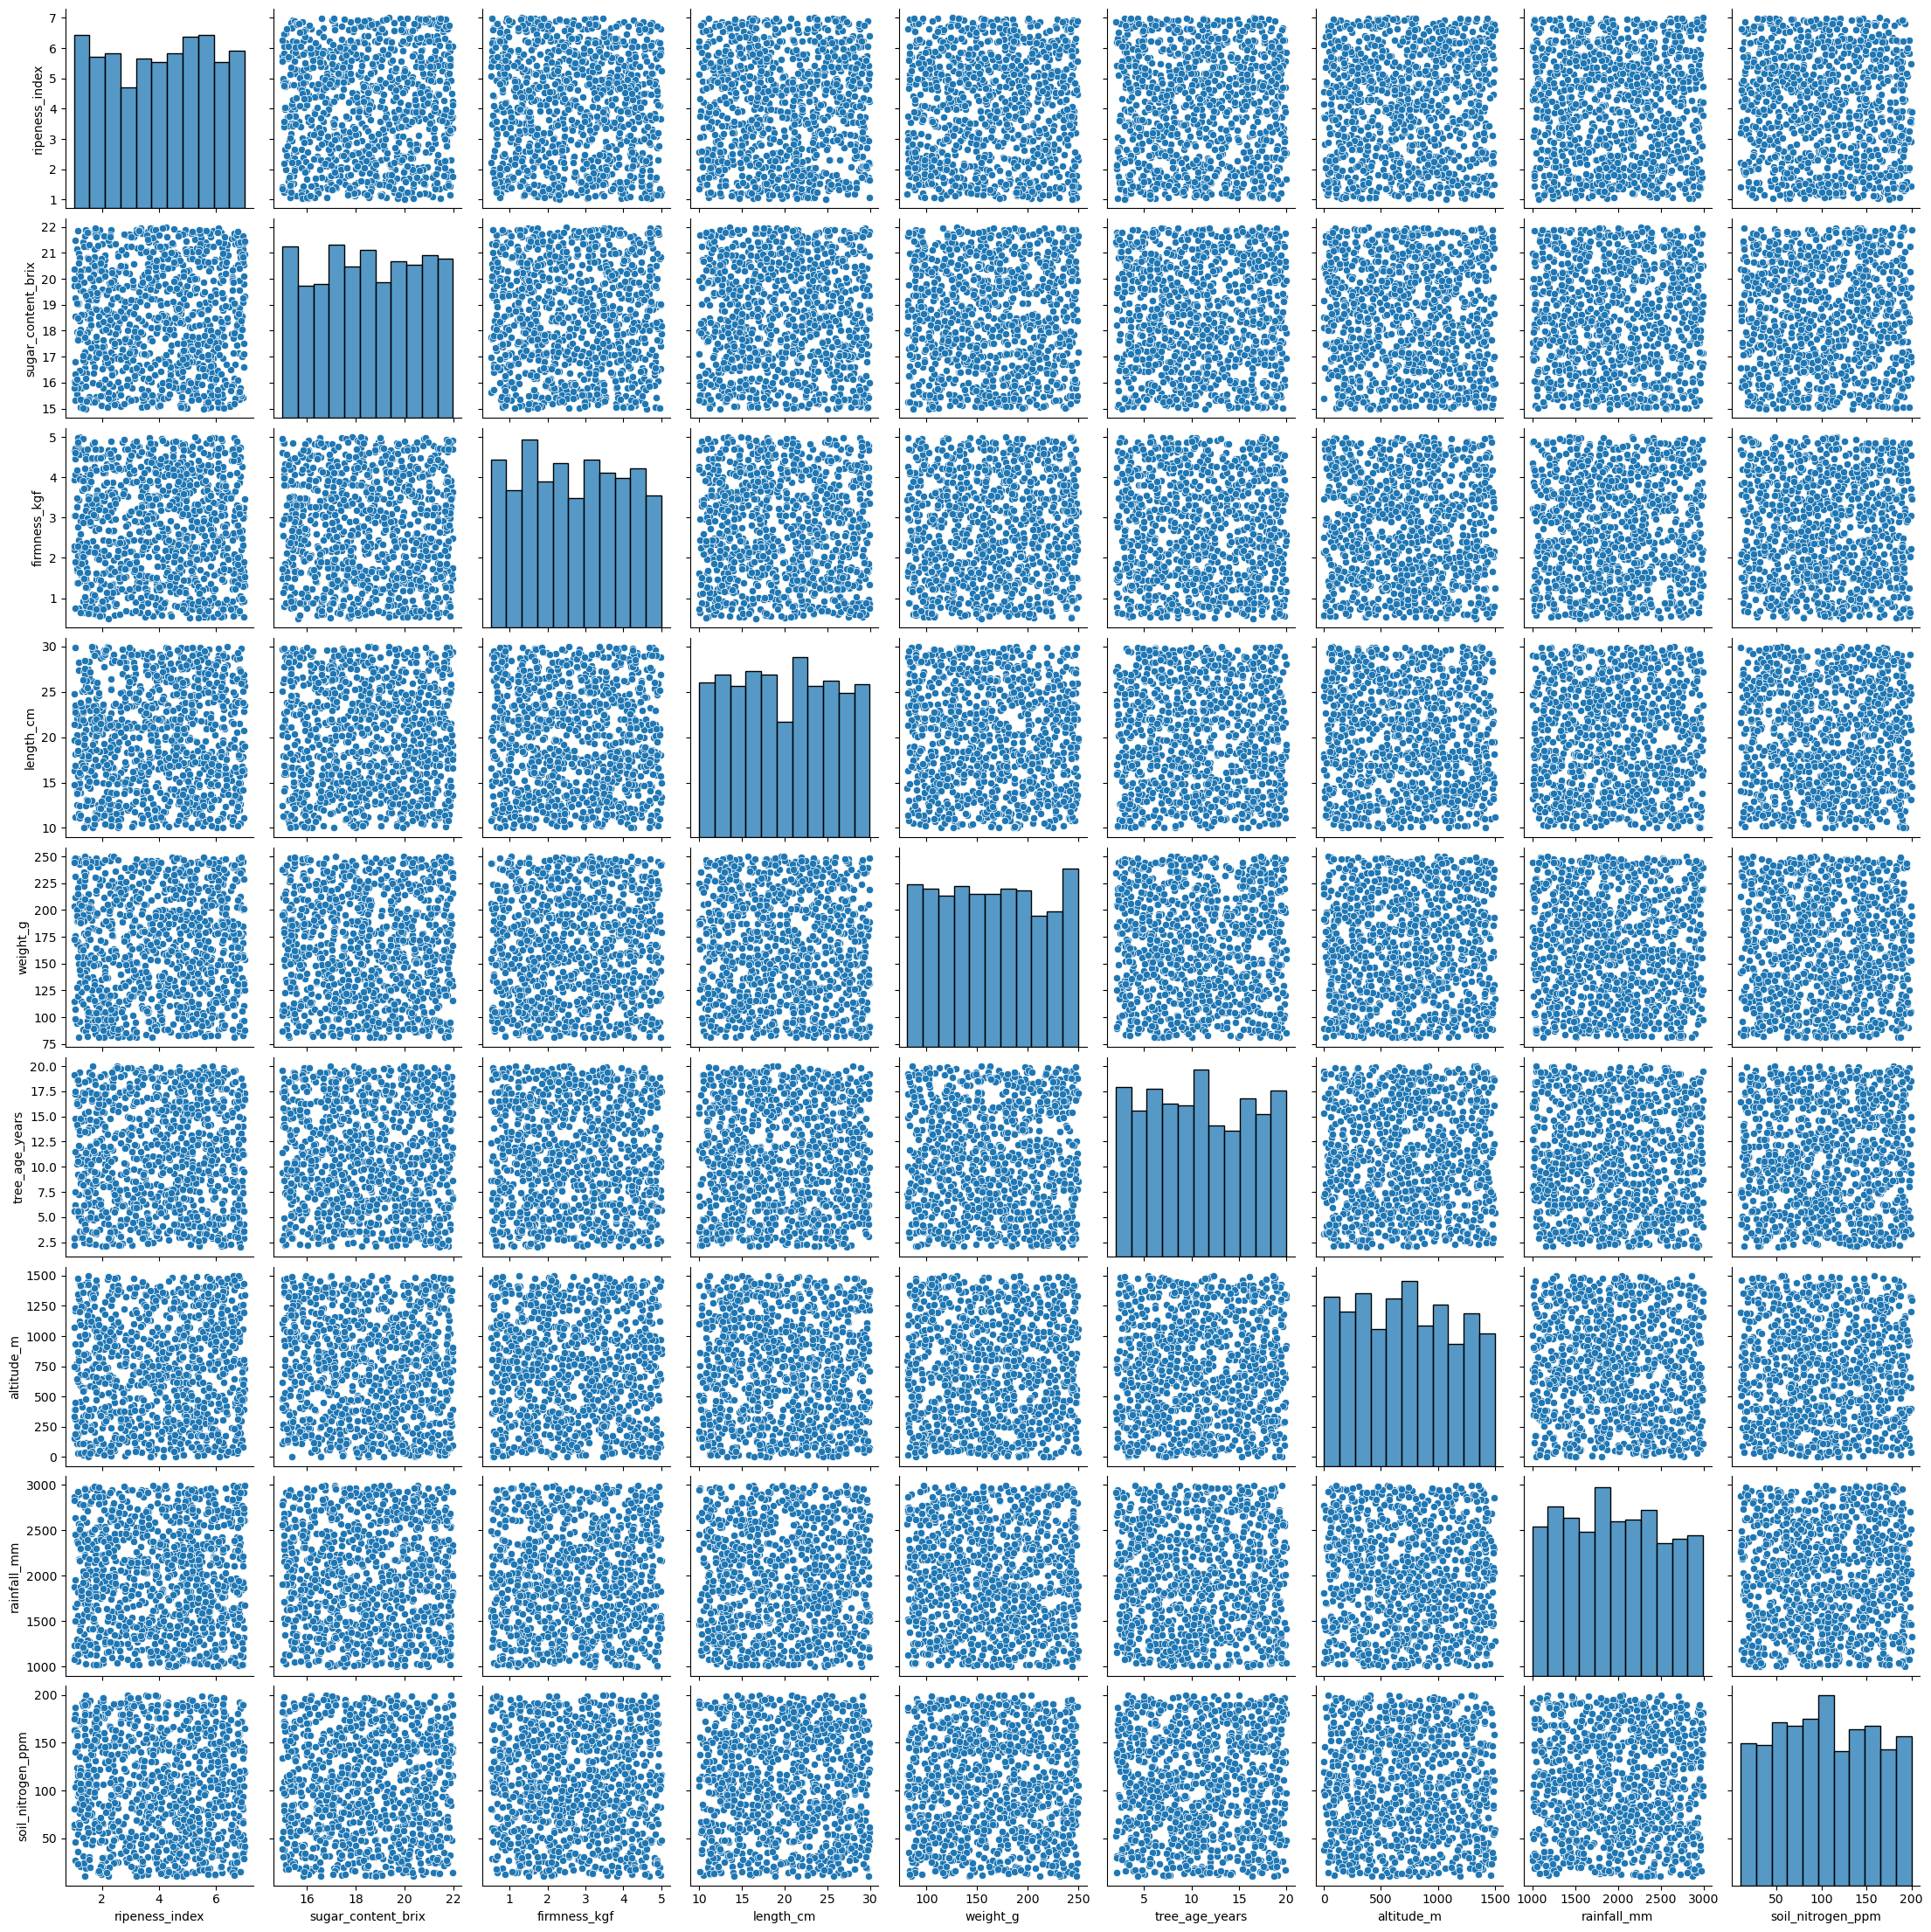

In [42]:
sns.pairplot(df)